In [1]:
# First, import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore')

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# Let's do some Exploratory Data Analysis(EDA)

<AxesSubplot:title={'center':'Age vs Charges'}, xlabel='age', ylabel='charges'>

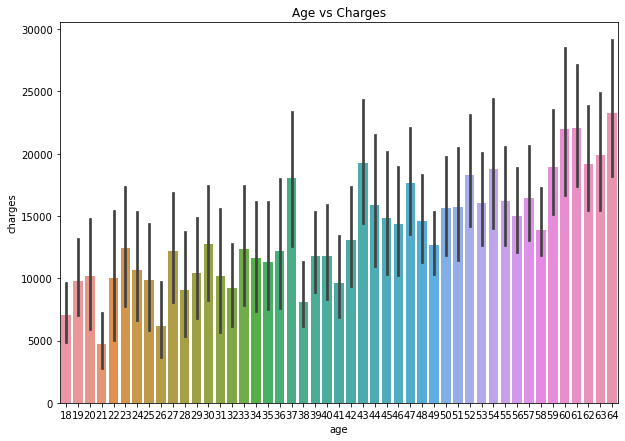

In [11]:
plt.figure(figsize=(10,7))
plt.title('Age vs Charges')
sns.barplot(x='age',y='charges',data=df)

We can clearly see that as age increases, the medical insurance cost also increases

<AxesSubplot:title={'center':'Region vs Charges'}, xlabel='region', ylabel='charges'>

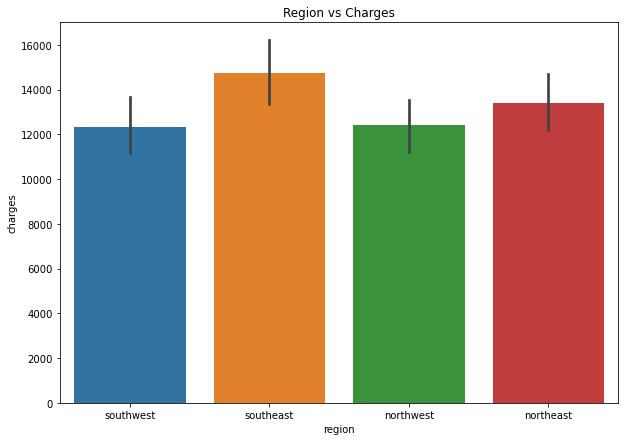

In [12]:
plt.figure(figsize=(10,7))
plt.title('Region vs Charges')
sns.barplot(x='region',y='charges',data=df)

<AxesSubplot:title={'center':'Smoker vs Charges'}, xlabel='smoker', ylabel='charges'>

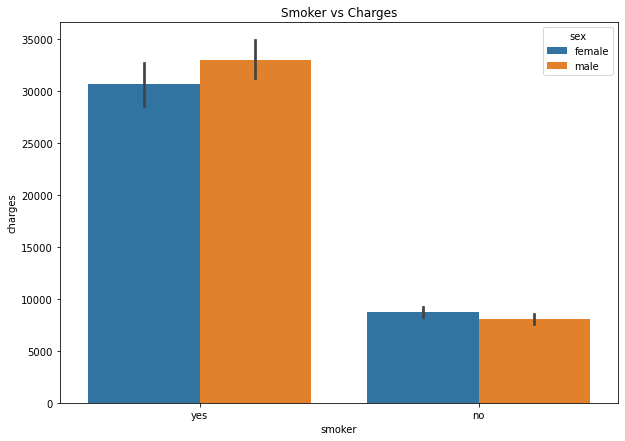

In [13]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charges')
sns.barplot(x='smoker',y='charges',data=df,hue='sex')

Smokers irrespective of gender have more medical insurance charges

<AxesSubplot:xlabel='sex', ylabel='charges'>

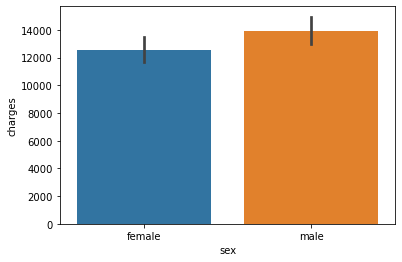

In [14]:
sns.barplot(df["sex"],df["charges"])

Males tend to have more medical insurance charges compared to females.

<AxesSubplot:xlabel='children', ylabel='charges'>

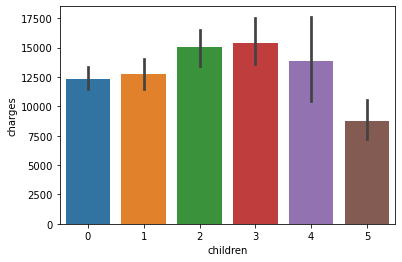

In [15]:
sns.barplot(df["children"],df["charges"])

<AxesSubplot:xlabel='bmi', ylabel='Density'>

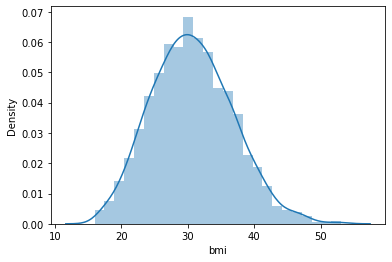

In [16]:
sns.distplot(df["bmi"])

well the data is approximately normally distributed seems no outlier present in it

In [19]:
#Converting category labels into numerical using LabelEncoder

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [26]:
clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }

In [27]:
df.replace(clean_data,inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


# Correlation using a Heatmap


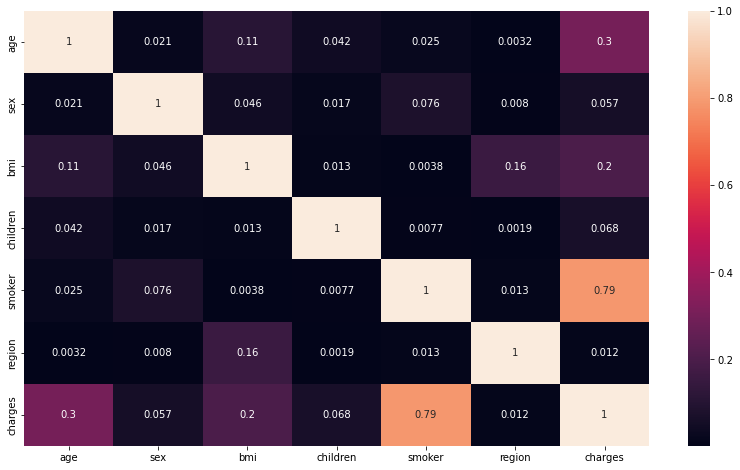

In [28]:
df_corr = df.corr().abs()

plt.figure(figsize=(14,8))
sns.heatmap(df_corr, annot= True)
plt.show()

 except with smoking no corelation is present

In [31]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

In [34]:
X

,0,1,2,3,4,5
0,-1.438764,1.010519,-0.453320,-0.908614,1.970587,1.343746
1,-1.509965,-0.989591,0.509621,-0.078767,-0.507463,0.438898
2,-0.797954,-0.989591,0.383307,1.580926,-0.507463,0.438898
3,-0.441948,-0.989591,-1.305531,-0.908614,-0.507463,-1.370796
4,-0.513149,-0.989591,-0.292556,-0.908614,-0.507463,-1.370796
...,...,...,...,...,...,...
1333,0.768473,-0.989591,0.050297,1.580926,-0.507463,-1.370796
1334,-1.509965,1.010519,0.206139,-0.908614,-0.507463,-0.465949
1335,-1.509965,1.010519,1.014878,-0.908614,-0.507463,0.438898
1336,-1.296362,1.010519,-0.797813,-0.908614,-0.507463,1.343746


In [35]:
X = np.array(df.iloc[:,:-1]) # Independent variables
y = np.array(df.iloc[:,-1])   # Dependent variable

In [36]:
# Split the dataset into Training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [40]:
#importing ml library

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import *

# Linear Regression

In [44]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_test = lr.predict(X_test)

In [47]:
#R2 Score for training data
y_pred_train = lr.predict(X_train)
r2_score_train_linear = r2_score(y_train, y_pred_train)

#R2 Score for testing data
y_pred_test = lr.predict(X_test)
r2_score_test_linear = r2_score(y_test, y_pred_test)

#Root mean squared error
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('R2_score (Train Accuracy) : ',(r2_score_train_linear))
print('R2_score (Test Accuracy) : ',(r2_score_test_linear))
print('RMSE : ',(rmse_linear))

R2_score (Train Accuracy) :  0.7302726684938983
R2_score (Test Accuracy) :  0.7906265855205847
RMSE :  5778.29269033704


# RIDGE REGRESSION

In [52]:
ridge_model = Ridge(alpha=1)

ridge_model.fit(X_train,y_train)

y_pred_test = ridge_model.predict(X_test)

In [54]:
#R2 Score for training data
y_pred_train = ridge_model.predict(X_train)
r2_score_train_ridge = r2_score(y_train, y_pred_train)

#R2 Score for testing data
y_pred_test = ridge_model.predict(X_test)
r2_score_test_ridge = r2_score(y_test, y_pred_test)

#Root mean squared error
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('R2_score (Train Accuracy) : ',(r2_score_train_ridge))
print('R2_score (Test Accuracy) : ',(r2_score_test_ridge))
print('RMSE : ',(rmse_ridge))

R2_score (Train Accuracy) :  0.7302453594205098
R2_score (Test Accuracy) :  0.7901698550031911
RMSE :  5784.591687103805


# RANDOM FOREST REGRESSOR


In [55]:
random_model = RandomForestRegressor()

random_model.fit(X_train,y_train)

y_pred_test = random_model.predict(X_test)

In [56]:
#R2 Score for training data
y_pred_train = random_model.predict(X_train)
r2_score_train_random = r2_score(y_train, y_pred_train)

#R2 Score for testing data
y_pred_test = random_model.predict(X_test)
r2_score_test_random = r2_score(y_test, y_pred_test)

#Root mean squared error
rmse_random = (np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('R2_score (Train Accuracy) : ',(r2_score_train_random))
print('R2_score (Test Accuracy) : ',(r2_score_test_random))
print('RMSE : ',(rmse_random))

R2_score (Train Accuracy) :  0.9738349429755595
R2_score (Test Accuracy) :  0.8583984427610696
RMSE :  4751.960078912523


# DECISION TREE REGRESSION


In [58]:
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)

y_pred_test = DT.predict(X_test)

In [60]:
#R2 Score for training data
y_pred_train = DT.predict(X_train)
r2_score_train_dt = r2_score(y_train, y_pred_train)

#R2 Score for testing data
y_pred_test = DT.predict(X_test)
r2_score_test_dt = r2_score(y_test, y_pred_test)

#Root mean squared error
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('R2_score (Train Accuracy) : ',(r2_score_train_dt))
print('R2_score (Test Accuracy) : ',(r2_score_test_dt))
print('RMSE : ',(rmse_dt))

R2_score (Train Accuracy) :  0.9994078632651511
R2_score (Test Accuracy) :  0.7201448032125566
RMSE :  6680.445983602803


# GradientBoostingRegressor

In [67]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
y_pred_test=gb.predict(X_test)

In [68]:
#R2 Score for training data
y_pred_train = gb.predict(X_train)
r2_score_train_gb = r2_score(y_train, y_pred_train)

#R2 Score for testing data
y_pred_test = gb.predict(X_test)
r2_score_test_gb = r2_score(y_test, y_pred_test)

#Root mean squared error
rmse_gb = (np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('R2_score (Train Accuracy) : ',(r2_score_train_gb))
print('R2_score (Test Accuracy) : ',(r2_score_test_gb))
print('RMSE : ',(rmse_gb))

R2_score (Train Accuracy) :  0.9001160415435755
R2_score (Test Accuracy) :  0.8879384651103315
RMSE :  4227.338764307395


 It seems the Gradient Boosting Regression model is the best choice for my dataset. Lets tune it using gridsearchcv

# HYPERPARAMETER TUNING

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
# Create the parameters for GridSearchCV
gb_param = {"n_estimators":[75,100,150,200,300,400],"learning_rate":[0.01,0.05,0.1,0.2,0.3],"min_samples_leaf":[0.7,0.8,0.9,1,1.1,1.2],"max_depth":[2,3,4,5,6]}

In [80]:
gb_grid = GridSearchCV(gb,gb_param,cv=5)
gb_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [0.7, 0.8, 0.9, 1, 1.1, 1.2],
                         'n_estimators': [75, 100, 150, 200, 300, 400]})

In [81]:
gb_grid.best_params_

{'learning_rate': 0.05,
 'max_depth': 2,
 'min_samples_leaf': 1,
 'n_estimators': 200}

In [99]:
new_gb = GradientBoostingRegressor(learning_rate=0.01,max_depth=3,min_samples_leaf=1,n_estimators=400)
new_gb.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=400)

In [100]:
final_model_pred= new_gb.predict(X_test)
new_gb.score(X_test,y_test)

0.8929989701691528

so we got accuracy of 89% by tuning the parameter of our best model i.e.GradientBoostingRegressor 

# saving the model

In [102]:
import pickle
filename = 'medical_cost_insurance.pkl'
pickle.dump(new_gb,open(filename,'wb'))#saved model

In [104]:
import pickle
loaded_model=pickle.load(open('medical_cost_insurance.pkl','rb'))
result=loaded_model.score(X_test,y_test)
print(result*100)

89.29989701691528
